In [2]:
import pandas as pd

In [3]:
file_path_train = "./archive/aug_train.csv"
file_path_test = "./archive/aug_test.csv"
file_path_ss = "./archive/sample_submission.csv"
hr_train = pd.read_csv(file_path_train) 
hr_test = pd.read_csv(file_path_test) 
hr_ss = pd.read_csv(file_path_ss) 

In [4]:
hr_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
f_num = ["city_development_index","training_hours"]
f_cat = ["city","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job"]
f_total = f_num + f_cat + ["target"]
f_total

['city_development_index',
 'training_hours',
 'city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'target']

# PORCENTAJE DE VALORES NULOS

In [8]:
data = hr_train[f_total]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   training_hours          19158 non-null  int64  
 2   city                    19158 non-null  object 
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [9]:
data = hr_train[f_total]
#data = hr_test[f_total]
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,"column_type":[type(data[i][0]) for i in data.columns],
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,column_type,percent_missing
city_development_index,city_development_index,<class 'numpy.float64'>,0.000000
training_hours,training_hours,<class 'numpy.int64'>,0.000000
city,city,<class 'str'>,0.000000
gender,gender,<class 'str'>,23.530640
relevent_experience,relevent_experience,<class 'str'>,0.000000
enrolled_university,enrolled_university,<class 'str'>,2.014824
education_level,education_level,<class 'str'>,2.401086
major_discipline,major_discipline,<class 'str'>,14.683161
experience,experience,<class 'str'>,0.339284
company_size,company_size,<class 'float'>,30.994885


In [10]:
data = hr_train[f_total]
data["gender"] = data["gender"].fillna(data["gender"].mode().iloc[0])
data["enrolled_university"] = data["enrolled_university"].fillna(data["enrolled_university"].mode().iloc[0])
data["education_level"] = data["education_level"].fillna(data["education_level"].mode().iloc[0])
data["major_discipline"] = data["major_discipline"].fillna(data["major_discipline"].mode().iloc[0])
data["experience"] = data["experience"].fillna(data["experience"].mode().iloc[0])
data["last_new_job"] = data["last_new_job"].fillna(data["last_new_job"].mode().iloc[0])
data["company_size"] = data["company_size"].fillna(data["company_size"].mode().iloc[0])
data["company_type"] = data["company_type"].fillna(data["company_type"].mode().iloc[0])

<ipython-input-10-e95e5e98e484>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gender"] = data["gender"].fillna(data["gender"].mode().iloc[0])
<ipython-input-10-e95e5e98e484>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["enrolled_university"] = data["enrolled_university"].fillna(data["enrolled_university"].mode().iloc[0])
<ipython-input-10-e95e5e98e484>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   training_hours          19158 non-null  int64  
 2   city                    19158 non-null  object 
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [12]:
#melbourne_data.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print("ANTES DE BORRAR NAN")
print(data.shape)
print("DESPUES DE BORRAR NAN")
d = data.copy()
d.dropna(inplace=True)
print(d.shape)

ANTES DE BORRAR NAN
(19158, 13)
DESPUES DE BORRAR NAN
(19158, 13)


# Estimacion de ubicacion Media, Moda, Mediana

In [13]:
data.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [14]:
hr_test[f_num].describe()

,city_development_index,training_hours
count,2129.000000,2129.000000
mean,0.824984,64.983091
std,0.125074,60.238660
min,0.448000,1.000000
25%,0.698000,23.000000
50%,0.903000,47.000000
75%,0.920000,86.000000
max,0.949000,334.000000


In [15]:
hr_ss.describe()

,enrollee_id,target
count,2129.000000,2129.0
mean,16861.614843,0.5
std,9576.846029,0.0
min,3.000000,0.5
25%,8562.000000,0.5
50%,16816.000000,0.5
75%,25129.000000,0.5
max,33353.000000,0.5


In [16]:
# Central tendency refers to the idea that there is one number that best summarizes the entire set of measurements, a number that is in some way “central” to the set.
import math
from scipy.stats import skew
from scipy import stats
import numpy as np

l = []
for f in f_num:
  m = data[f].mean(skipna=True)
  mn = data[f].median(skipna=True)
  mo = pd.Series(data[f].values.flatten()).mode()[0]

  mylist = data[f].tolist()
  newlist = [x for x in mylist if math.isnan(x) == False]
  tm = stats.trim_mean(newlist, 0.05) # sin valores NAN


  variance = np.var(newlist)
  standard_deviation = np.std(newlist)  # df["Population"].std()
  trimmed_standard_deviation = stats.tstd(newlist)
  
  Q1 = np.quantile(newlist, q=0.25)  # Can also use dataframe.quantile(0.25)
  Q3 = np.quantile(newlist, q=0.75)  # Can also use dataframe.quantile(0.75)
  IQR = Q3 - Q1

  sk = skew(newlist)

  #"variance":"{:.2f}".format(variance),
  l.append({"feature":f,"mean":"{:.2f}".format(m),"triammed_mean_5":"{:.2f}".format(tm),"meadian":mn,"mode":mo,"Skew":sk,
            "standard_deviation":"{:.2f}".format(standard_deviation),
            "trimmed_standard_deviation":"{:.2f}".format(trimmed_standard_deviation),"Q1":"{:.2f}".format(Q1),
            "Q3":"{:.2f}".format(Q3),"IQR":"{:.2f}".format(IQR)
            })


df = pd.DataFrame(l)
df

,feature,mean,triammed_mean_5,meadian,mode,Skew,standard_deviation,trimmed_standard_deviation,Q1,Q3,IQR
0,city_development_index,0.83,0.84,0.903,0.92,-0.995350,0.12,0.12,0.74,0.92,0.18
1,training_hours,65.37,58.52,47.000,28.00,1.819095,60.06,60.06,23.00,88.00,65.00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Training_hours'), Text(0, 0.5, 'Count')]

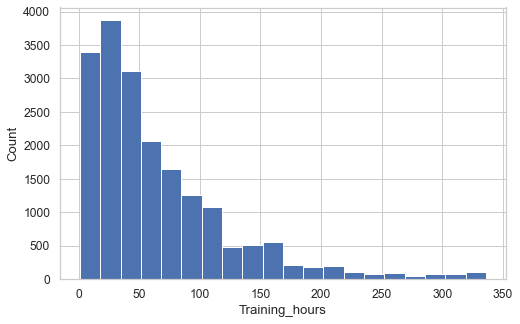

In [17]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['training_hours'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Training_hours', ylabel='Count')

[Text(0.5, 0, 'city_development_index'), Text(0, 0.5, 'Count')]

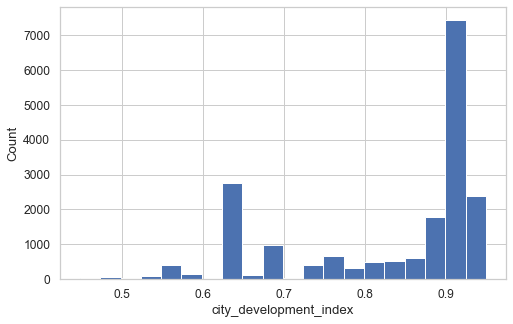

In [18]:

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['city_development_index'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='city_development_index', ylabel='Count')

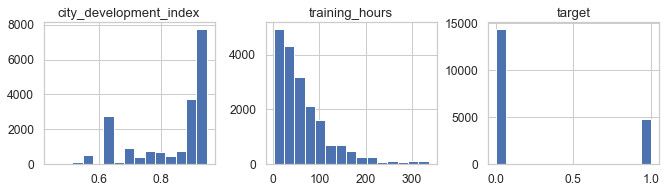

In [20]:
data.hist(bins=15, figsize=(15, 6), layout=(2, 4));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

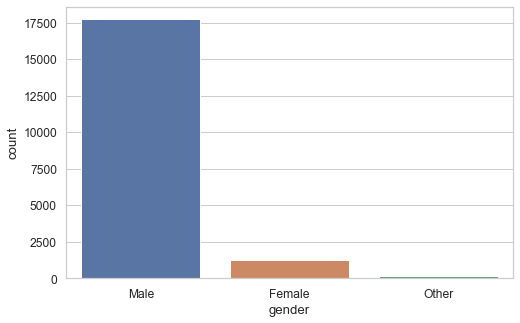

In [21]:
sns.countplot(data[f_cat[1]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

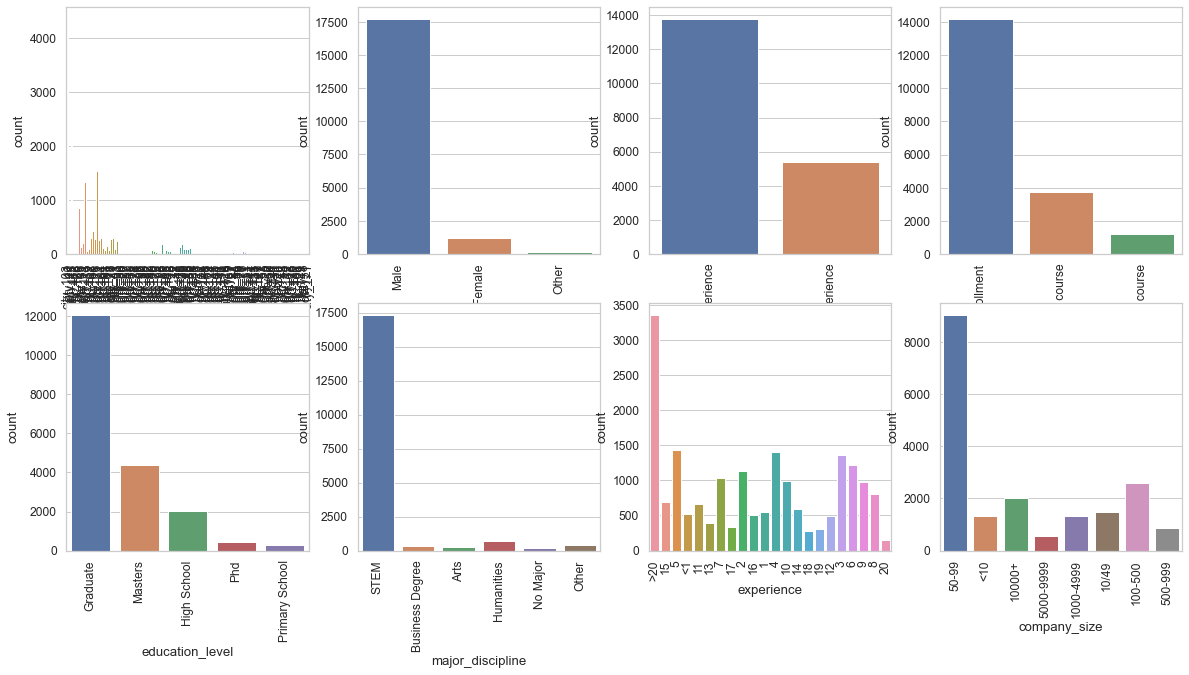

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(f_cat, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

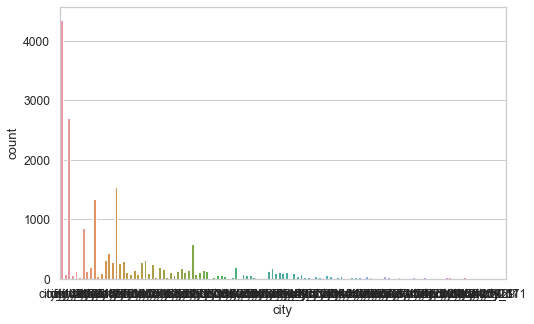

In [52]:
sns.countplot(data["city"])  
# gender
# relevent_experience
# enrolled_university
# education_level
# major_discipline

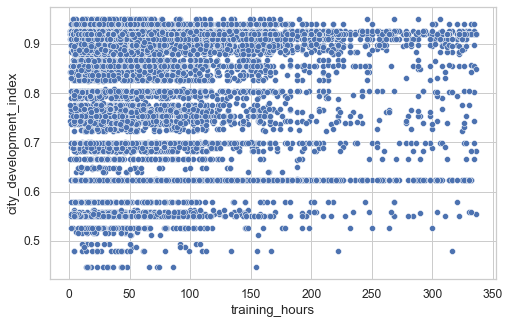

In [24]:
sns.scatterplot(x=data['training_hours'], y=data['city_development_index']);  # Minetras mayor indice de desarrollo de ciudad, mayor horas de entrenamiento

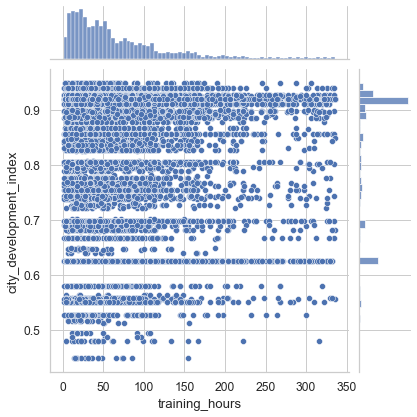

In [25]:
sns.jointplot(x=data['training_hours'], y=data['city_development_index']);

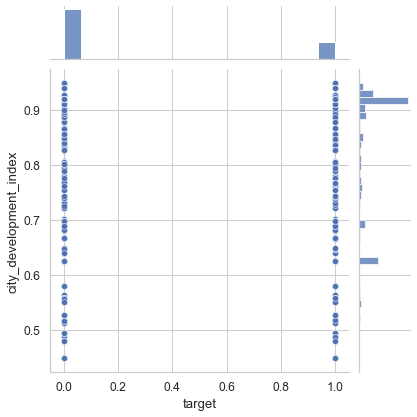

In [28]:
sns.jointplot(x=data['target'], y=data['city_development_index']);

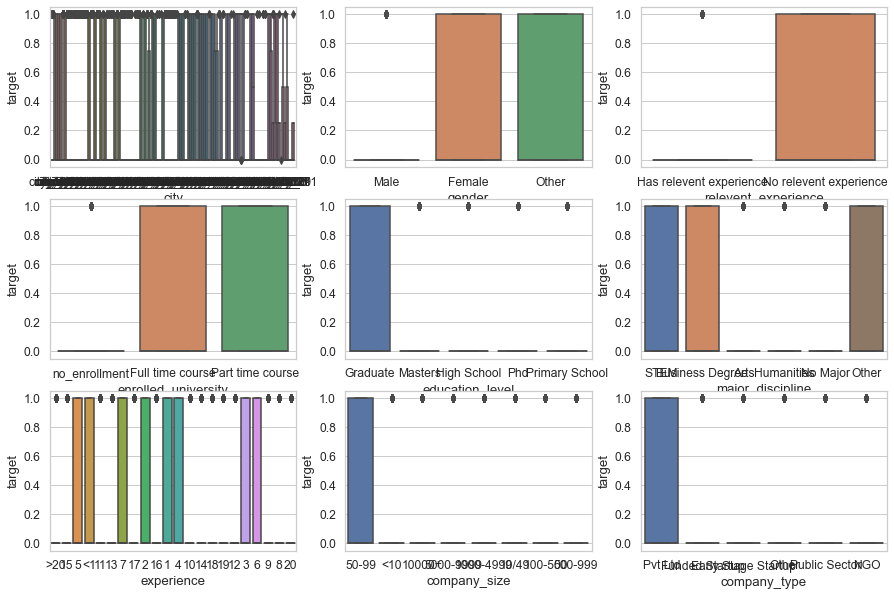

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(f_cat, ax.flatten()):
    sns.boxplot(x=var, y='target', data=data, ax=subplot)

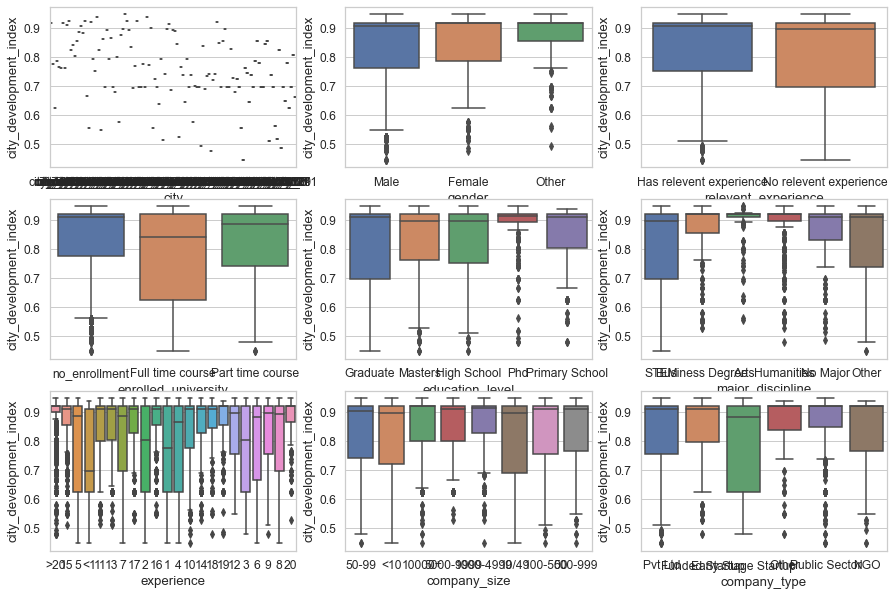

In [63]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(f_cat, ax.flatten()):
    sns.boxplot(x=var, y='city_development_index', data=data, ax=subplot)

<AxesSubplot:xlabel='experience', ylabel='city_development_index'>

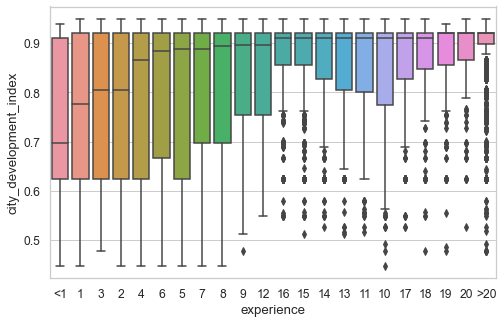

In [65]:
sorted_nb = data.groupby(['experience'])['city_development_index'].median().sort_values()
sns.boxplot(x=data['experience'], y=data['city_development_index'], order=list(sorted_nb.index))

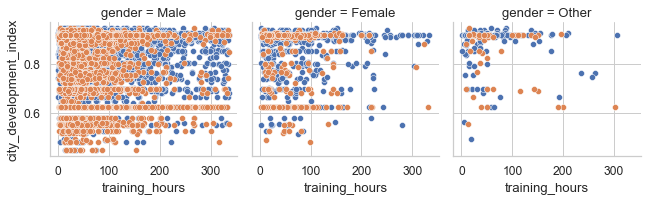

In [32]:
cond_plot = sns.FacetGrid(data=data, col='gender', hue='target', col_wrap=4)
cond_plot.map(sns.scatterplot, 'training_hours', 'city_development_index')

<AxesSubplot:>

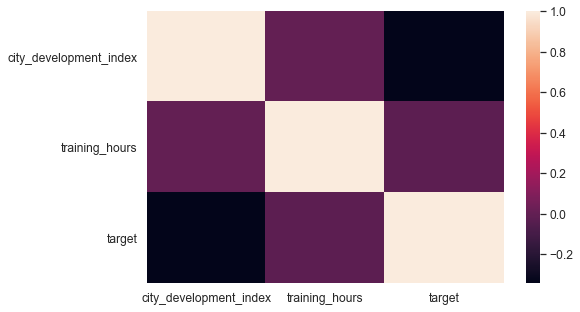

In [33]:
sns.heatmap(data.corr())

Text(0.5, 1.0, 'Features Correlating with Sales Price')

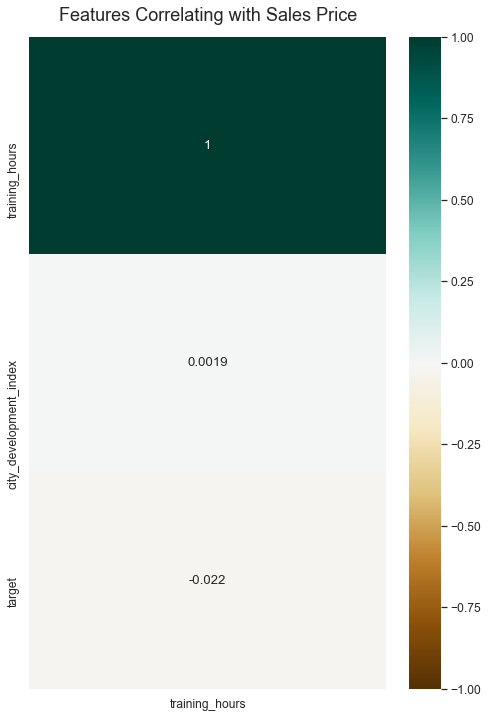

In [34]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['training_hours']].sort_values(by='training_hours', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)

<AxesSubplot:xlabel='training_hours'>

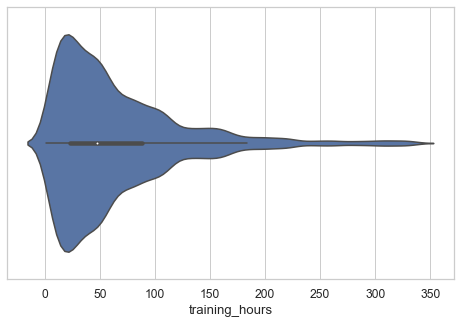

In [35]:
sns.violinplot(x="training_hours", data = data)

<AxesSubplot:xlabel='gender', ylabel='target'>

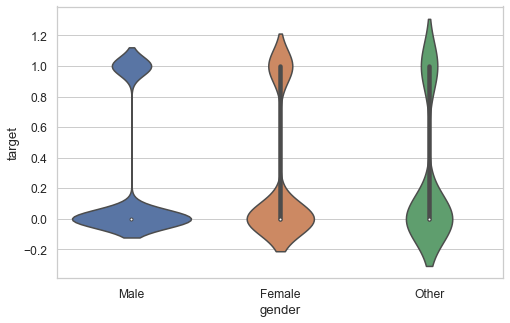

In [39]:
sns.violinplot(x="gender", y="target", data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.0% of the points

<AxesSubplot:xlabel='last_new_job', ylabel='training_hours'>

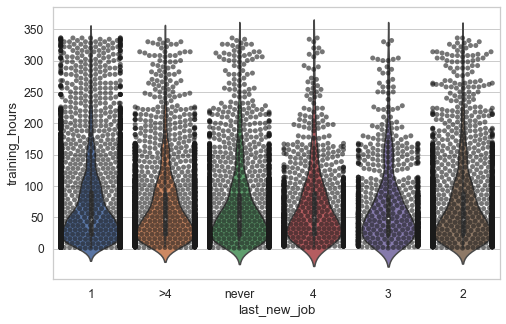

In [95]:
sns.violinplot(data = data, x='last_new_job', y='training_hours')
sns.swarmplot(data = data, x='last_new_job', y='training_hours', color = 'k', alpha = 0.6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


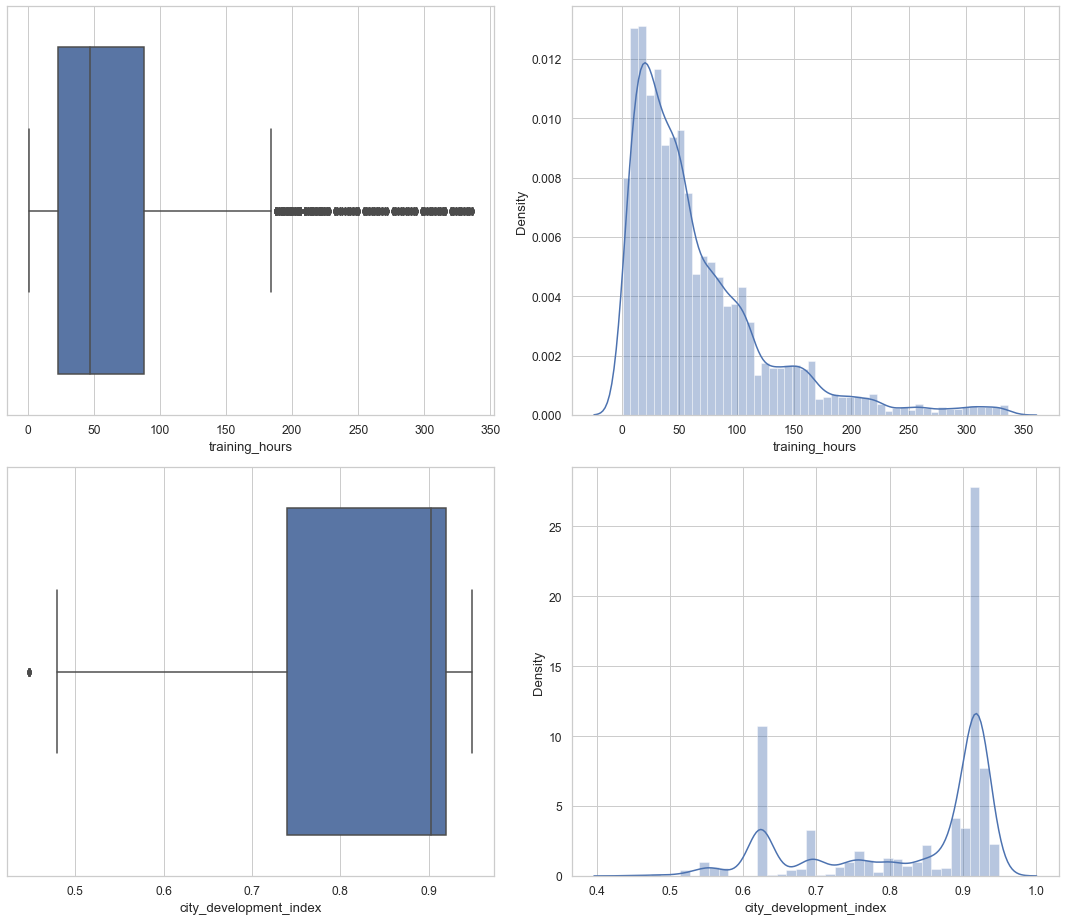

In [120]:
fig, ax = plt.subplots(2, 2, figsize = (15, 13))
sns.boxplot(x= data["training_hours"], ax = ax[0,0])
sns.distplot(data['training_hours'], ax = ax[0,1])
sns.boxplot(x= data["city_development_index"], ax = ax[1,0])
sns.distplot(data['city_development_index'], ax = ax[1,1])
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


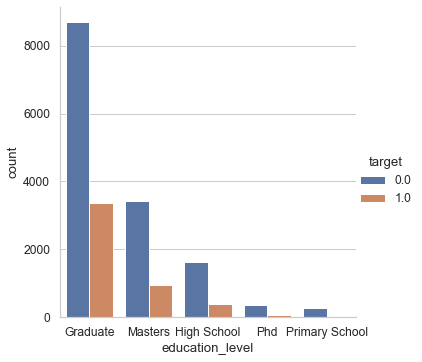

In [42]:
#sns.catplot("enrolled_university", hue="relevent_experience", data=data, kind="count")
#sns.catplot("enrolled_university", hue="education_level", data=data, kind="count")
#sns.catplot("enrolled_university", hue="major_discipline", data=data, kind="count")
sns.catplot("education_level", hue="target", data=data, kind="count")



In [44]:
data.columns

Index(['city_development_index', 'training_hours', 'city', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'target'],
      dtype='object')

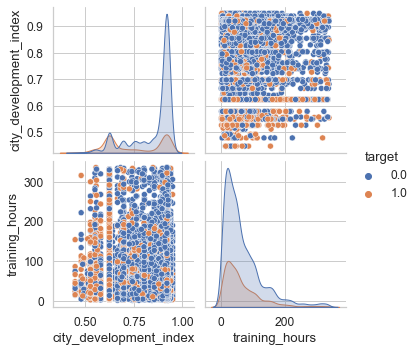

In [43]:
sns.pairplot(data, hue='target')